In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pulp import LpProblem, LpMaximize

In [8]:
# load Due_Register_jan_mar_2023.xlsx in pandas dataframe
data = pd.read_excel('Data/Due_Register_jan_mar_2023.xlsx', engine='openpyxl')

In [9]:
data.head()

,Sl.No,Member_Code,Member_Name,Component_Name,Loan_Code,Loan_Cycle,Loan_Disburse_Date,Last_Schedule_Date,Payment_Frequency,Disburse_Amount,Present_Loan_Amount,Due_Amount,Saving_Balance,NetClaim_Member,NetClaim_Organization,Day_of_Expire
0,1,0661-003-0197,Oliur,AGROSOR,AGROSOR-0661-003-0197-1,1,2016-10-30,2017-10-30,Monthly,50000,37492.17,37492.17,3030,0,34462.17,1978.0
1,2,0661-003-0217,Ohab,AGROSOR,AGROSOR-0661-003-0217-1,1,2017-08-13,2018-08-13,Monthly,100000,49767.54,49767.54,4722,0,45045.54,1691.0
2,3,0661-003-0555,Rashid,AGROSOR,AGROSOR-0661-003-0555-1,1,2017-10-25,2018-10-25,Monthly,75000,29912.28,29912.28,8527,0,21385.28,1618.0
3,4,0661-003-0218,Popi akthar,AGROSOR,AGROSOR-0661-003-0218-1,1,2017-10-31,2018-11-03,Monthly,75000,8184.21,8184.21,485,0,7699.21,1609.0
4,5,0661-003-0686,Nurmohammad,AGROSOR,AGROSOR-0661-003-0686-1,1,2018-02-26,2019-02-27,Monthly,100000,32347.37,32347.37,100,0,32247.37,1493.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sl.No                  678 non-null    int64         
 1   Member_Code            678 non-null    object        
 2   Member_Name            678 non-null    object        
 3   Component_Name         678 non-null    object        
 4   Loan_Code              678 non-null    object        
 5   Loan_Cycle             678 non-null    int64         
 6   Loan_Disburse_Date     678 non-null    datetime64[ns]
 7   Last_Schedule_Date     678 non-null    datetime64[ns]
 8   Payment_Frequency      678 non-null    object        
 9   Disburse_Amount        678 non-null    int64         
 10  Present_Loan_Amount    678 non-null    float64       
 11  Due_Amount             678 non-null    float64       
 12  Saving_Balance         678 non-null    int64         
 13  NetCl

In [11]:
data.describe()

,Sl.No,Loan_Cycle,Disburse_Amount,Present_Loan_Amount,Due_Amount,Saving_Balance,NetClaim_Member,NetClaim_Organization,Day_of_Expire
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.0,678.000000,645.000000
mean,339.500000,1.641593,42216.814159,16969.280619,16003.623687,1467.800885,0.0,15501.479735,879.412403
std,195.866026,0.874645,34038.711308,18533.300203,16028.402420,3461.286609,0.0,16730.339844,413.690192
min,1.000000,1.000000,5000.000000,355.750000,355.750000,100.000000,0.0,68.750000,8.000000
25%,170.250000,1.000000,23250.000000,6229.867500,5853.537500,169.000000,0.0,5454.055000,653.000000
50%,339.500000,1.000000,30000.000000,12184.640000,11449.545000,297.000000,0.0,11099.630000,857.000000
75%,508.750000,2.000000,50000.000000,20814.935000,20388.275000,464.750000,0.0,19535.662500,993.000000
max,678.000000,6.000000,300000.000000,236828.190000,139912.280000,27185.000000,0.0,221417.190000,1978.000000


In [12]:
data.isnull().sum()

Sl.No                     0
Member_Code               0
Member_Name               0
Component_Name            0
Loan_Code                 0
Loan_Cycle                0
Loan_Disburse_Date        0
Last_Schedule_Date        0
Payment_Frequency         0
Disburse_Amount           0
Present_Loan_Amount       0
Due_Amount                0
Saving_Balance            0
NetClaim_Member           0
NetClaim_Organization     0
Day_of_Expire            33
dtype: int64

In [15]:
# what is the percentage of null values in each column
print(data.isnull().sum()/len(data)*100)

Sl.No                    0.000000
Member_Code              0.000000
Member_Name              0.000000
Component_Name           0.000000
Loan_Code                0.000000
Loan_Cycle               0.000000
Loan_Disburse_Date       0.000000
Last_Schedule_Date       0.000000
Payment_Frequency        0.000000
Disburse_Amount          0.000000
Present_Loan_Amount      0.000000
Due_Amount               0.000000
Saving_Balance           0.000000
NetClaim_Member          0.000000
NetClaim_Organization    0.000000
Day_of_Expire            4.867257
dtype: float64


In [18]:
# Create the optimization problem
problem = LpProblem("Payment_Schedule_Optimization", LpMaximize)

In [19]:
from pulp import LpVariable

num_rows = len(data)
schedule_vars = [LpVariable(f"Schedule_{i}", lowBound=0, cat='Continuous') for i in range(num_rows)]

In [20]:
from pulp import lpSum

# Set the objective function
problem += lpSum(schedule_vars)

In [21]:
# Set the constraints
for i in range(num_rows):
    problem += schedule_vars[i] <= data.at[i, 'Due_Amount']

In [22]:
# Solve the optimization problem
problem.solve()

1

In [29]:
# Check the status of the solution
# Check the status of the solution
if problem.status == 1:
    print("Optimization problem solved successfully.")
    print("----- Optimal Payment Schedule -----")
    for i in range(num_rows):
        schedule = schedule_vars[i].varValue
        member_code = data.at[i, 'Member_Code']
        due_amount = data.at[i, 'Due_Amount']
        print(f"Member: {member_code}, Payment: {schedule:.2f}/{due_amount:.2f}")
elif problem.status == 0:
    print("Optimization problem is not solved yet.")
elif problem.status == -1:
    print("Optimization problem is infeasible.")
elif problem.status == -2:
    print("Optimization problem is unbounded.")
elif problem.status == -3:
    print("Optimization problem is undefined.")
else:
    print("Unknown status code for the optimization problem.")

Optimization problem solved successfully.
----- Optimal Payment Schedule -----
Member: 0661-003-0197, Payment: 37492.17/37492.17
Member: 0661-003-0217, Payment: 49767.54/49767.54
Member: 0661-003-0555, Payment: 29912.28/29912.28
Member: 0661-003-0218, Payment: 8184.21/8184.21
Member: 0661-003-0686, Payment: 32347.37/32347.37
Member: 0661-003-0102, Payment: 41184.21/41184.21
Member: 0661-003-0692, Payment: 3157.52/3157.52
Member: 0661-003-0600, Payment: 29255.17/29255.17
Member: 0661-003-0002, Payment: 3884.07/3884.07
Member: 0661-003-0723, Payment: 21447.37/21447.37
Member: 0661-003-0727, Payment: 11403.51/11403.51
Member: 0661-003-0725, Payment: 82608.77/82608.77
Member: 0661-003-0007, Payment: 13895.61/13895.61
Member: 0661-003-0006, Payment: 19716.67/19716.67
Member: 0661-003-0696, Payment: 5023.89/5023.89
Member: 0661-003-0697, Payment: 58178.95/58178.95
Member: 0661-003-0699, Payment: 46052.63/46052.63
Member: 0661-003-0693, Payment: 27008.85/27008.85
Member: 0661-003-0702, Paymen

In [30]:
# Check the status of the solution
if problem.status == 1:
    print("Optimization problem solved successfully.")
    print("----- Optimal Payment Schedule -----")
    for i in range(num_rows):
        schedule = schedule_vars[i].varValue
        member_code = data.at[i, 'Member_Code']
        member_name = data.at[i, 'Member_Name']
        component_name = data.at[i, 'Component_Name']
        loan_code = data.at[i, 'Loan_Code']
        loan_cycle = data.at[i, 'Loan_Cycle']
        loan_disburse_date = pd.to_datetime(data.at[i, 'Loan_Disburse_Date']).strftime('%d/%m/%Y')
        last_schedule_date = pd.to_datetime(data.at[i, 'Last_Schedule_Date']).strftime('%d/%m/%Y')
        payment_frequency = data.at[i, 'Payment_Frequency']
        disburse_amount = data.at[i, 'Disburse_Amount']
        present_loan_amount = data.at[i, 'Present_Loan_Amount']
        due_amount = data.at[i, 'Due_Amount']
        saving_balance = data.at[i, 'Saving_Balance']
        net_claim_member = data.at[i, 'NetClaim_Member']
        net_claim_organization = data.at[i, 'NetClaim_Organization']
        day_of_expire = data.at[i, 'Day_of_Expire']
        print(f"Member Code: {member_code}")
        print(f"Member Name: {member_name}")
        print(f"Component Name: {component_name}")
        print(f"Loan Code: {loan_code}")
        print(f"Loan Cycle: {loan_cycle}")
        print(f"Loan Disburse Date: {loan_disburse_date}")
        print(f"Last Schedule Date: {last_schedule_date}")
        print(f"Payment Frequency: {payment_frequency}")
        print(f"Disburse Amount: {disburse_amount:.2f}")
        print(f"Present Loan Amount: {present_loan_amount:.2f}")
        print(f"Due Amount: {due_amount:.2f}")
        print(f"Saving Balance: {saving_balance:.2f}")
        print(f"Net Claim (Member): {net_claim_member}")
        print(f"Net Claim (Organization): {net_claim_organization}")
        print(f"Day of Expire: {day_of_expire}")
        print(f"Payment: {schedule:.2f}/{due_amount:.2f}")
        print("-------------------------------------")
else:
    print("Optimization problem did not reach an optimal solution.")

Optimization problem solved successfully.
----- Optimal Payment Schedule -----
Member Code: 0661-003-0197
Member Name: Oliur
Component Name: AGROSOR
Loan Code: AGROSOR-0661-003-0197-1
Loan Cycle: 1
Loan Disburse Date: 30/10/2016
Last Schedule Date: 30/10/2017
Payment Frequency: Monthly
Disburse Amount: 50000.00
Present Loan Amount: 37492.17
Due Amount: 37492.17
Saving Balance: 3030.00
Net Claim (Member): 0
Net Claim (Organization): 34462.17
Day of Expire: 1978.0
Payment: 37492.17/37492.17
-------------------------------------
Member Code: 0661-003-0217
Member Name: Ohab
Component Name: AGROSOR
Loan Code: AGROSOR-0661-003-0217-1
Loan Cycle: 1
Loan Disburse Date: 13/08/2017
Last Schedule Date: 13/08/2018
Payment Frequency: Monthly
Disburse Amount: 100000.00
Present Loan Amount: 49767.54
Due Amount: 49767.54
Saving Balance: 4722.00
Net Claim (Member): 0
Net Claim (Organization): 45045.54
Day of Expire: 1691.0
Payment: 49767.54/49767.54
-------------------------------------
Member Code: 06

In [35]:
if problem.status == 1:
    print("Optimization problem solved successfully.")
    print("----- Optimal Payment Schedule -----")
    for i in range(num_rows):
        schedule = schedule_vars[i].varValue
        member_code = data.at[i, 'Member_Code']
        member_name = data.at[i, 'Member_Name']
        component_name = data.at[i, 'Component_Name']
        loan_code = data.at[i, 'Loan_Code']
        loan_cycle = data.at[i, 'Loan_Cycle']
        loan_disburse_date = pd.to_datetime(data.at[i, 'Loan_Disburse_Date']).strftime('%d/%m/%Y')
        last_schedule_date = pd.to_datetime(data.at[i, 'Last_Schedule_Date']).strftime('%d/%m/%Y')
        payment_frequency = data.at[i, 'Payment_Frequency']
        disburse_amount = data.at[i, 'Disburse_Amount']
        present_loan_amount = data.at[i, 'Present_Loan_Amount']
        due_amount = data.at[i, 'Due_Amount']
        saving_balance = data.at[i, 'Saving_Balance']
        net_claim_member = data.at[i, 'NetClaim_Member']
        net_claim_organization = data.at[i, 'NetClaim_Organization']
        day_of_expire = data.at[i, 'Day_of_Expire']

        print("Member Code:", member_code)
        print("Member Name:", member_name)
        print("Component Name:", component_name)
        print("Loan Code:", loan_code)
        print("Loan Cycle:", loan_cycle)
        print("Loan Disburse Date:", loan_disburse_date)
        print("Last Schedule Date:", last_schedule_date)
        print("Payment Frequency:", payment_frequency)
        print("Disburse Amount:", "{:.2f}".format(disburse_amount) if disburse_amount is not None else "")
        print("Present Loan Amount:", "{:.2f}".format(present_loan_amount) if present_loan_amount is not None else "")
        print("Due Amount:", "{:.2f}".format(due_amount) if due_amount is not None else "")
        print("Saving Balance:", "{:.2f}".format(saving_balance) if saving_balance is not None else "")
        print("Net Claim (Member):", net_claim_member)
        print("Net Claim (Organization):", net_claim_organization)
        print("Day of Expire:", day_of_expire)
        print("Payment:", "{:.2f}/{:.2f}".format(schedule, due_amount) if schedule is not None and due_amount is not None else "")
        print("-------------------------------------")
else:
    print("Optimization problem did not reach an optimal solution.")

Optimization problem solved successfully.
----- Optimal Payment Schedule -----
Member Code: 0661-003-0197
Member Name: Oliur
Component Name: AGROSOR
Loan Code: AGROSOR-0661-003-0197-1
Loan Cycle: 1
Loan Disburse Date: 30/10/2016
Last Schedule Date: 30/10/2017
Payment Frequency: Monthly
Disburse Amount: 50000.00
Present Loan Amount: 37492.17
Due Amount: 37492.17
Saving Balance: 3030.00
Net Claim (Member): 0
Net Claim (Organization): 34462.17
Day of Expire: 1978.0
Payment: 
-------------------------------------
Member Code: 0661-003-0217
Member Name: Ohab
Component Name: AGROSOR
Loan Code: AGROSOR-0661-003-0217-1
Loan Cycle: 1
Loan Disburse Date: 13/08/2017
Last Schedule Date: 13/08/2018
Payment Frequency: Monthly
Disburse Amount: 100000.00
Present Loan Amount: 49767.54
Due Amount: 49767.54
Saving Balance: 4722.00
Net Claim (Member): 0
Net Claim (Organization): 45045.54
Day of Expire: 1691.0
Payment: 
-------------------------------------
Member Code: 0661-003-0555
Member Name: Rashid
Co

In [36]:
import pandas as pd

# Load the data
#data = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual filename or path

def loan_risk_assessment(row):
    loan_amount = row['Disburse_Amount']
    credit_score = row['NetClaim_Organization']
    income = row['Present_Loan_Amount']

    if loan_amount > 100000:
        return "High"

    if credit_score < 600:
        return "High"

    if income < 30000:
        return "High"

    if loan_amount > 50000 and credit_score < 700:
        return "Medium"

    return "Low"

# Perform loan risk assessment for each row in the data
data['Loan_Risk_Level'] = data.apply(loan_risk_assessment, axis=1)

# Print the loan risk levels
print(data[['Member_Code', 'Loan_Risk_Level']])

       Member_Code Loan_Risk_Level
0    0661-003-0197             Low
1    0661-003-0217             Low
2    0661-003-0555            High
3    0661-003-0218            High
4    0661-003-0686             Low
..             ...             ...
673  0661-087-0007            High
674  0661-087-0010            High
675  0661-094-0003             Low
676  0661-018-0015            High
677  0661-018-0022            High

[678 rows x 2 columns]


C:\Users\Shakil\miniconda3\envs\learn\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


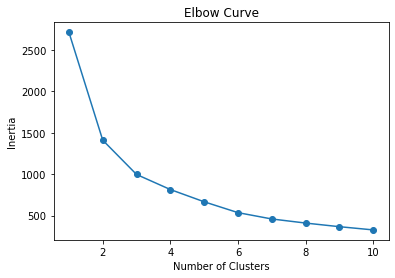

Cluster Centers:
   Disburse_Amount  Present_Loan_Amount    Due_Amount  Saving_Balance
0     26047.858942          7638.597481   7521.350176      412.390428
1    100725.000000         51289.672750  49395.509750     3310.475000
2     49879.464286         22373.926875  21283.221518     1741.044643
3    181176.470588         82900.148824  65954.048824    18178.647059

Cluster Sizes:
0    397
1     40
2    224
3     17
Name: Cluster, dtype: int64

Data with Cluster Labels:
     Sl.No    Member_Code                 Member_Name Component_Name  \
0        1  0661-003-0197                       Oliur        AGROSOR   
1        2  0661-003-0217                        Ohab        AGROSOR   
2        3  0661-003-0555                      Rashid        AGROSOR   
3        4  0661-003-0218                 Popi akthar        AGROSOR   
4        5  0661-003-0686                 Nurmohammad        AGROSOR   
..     ...            ...                         ...            ...   
673    674  0661-087-0

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select the relevant features for segmentation
features = ['Disburse_Amount', 'Present_Loan_Amount', 'Due_Amount', 'Saving_Balance']

# Perform feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to identify the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Based on the Elbow curve, choose the optimal number of clusters and fit the K-means model
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Add the predicted clusters to the original DataFrame
data['Cluster'] = kmeans.labels_

# Analyze the resulting clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Print the cluster centers and sizes
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Sizes:")
print(cluster_sizes)

# Assign cluster labels to each customer in the DataFrame
data['Cluster_Labels'] = data['Cluster'].map({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'})

# Output the updated DataFrame with cluster labels
print("\nData with Cluster Labels:")
print(data)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
from sklearn.ensemble import IsolationForest

df = pd.DataFrame(data)

# Select the features for fraud detection
features = ['Loan_Cycle', 'Disburse_Amount', 'Present_Loan_Amount', 'Due_Amount', 'Saving_Balance', 'NetClaim_Member', 'NetClaim_Organization', 'Day_of_Expire']

# Drop any rows with missing values
df = df.dropna(subset=features)

# Fit the Isolation Forest model for fraud detection
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(df[features])

# Predict the outliers (fraudulent instances)
outliers = model.predict(df[features])
df['Fraudulent'] = outliers

# Print the dataframe with the fraud detection results
print(df[['Member_Code', 'Member_Name', 'Fraudulent']])

       Member_Code        Member_Name  Fraudulent
0    0661-003-0197              Oliur           1
1    0661-003-0217               Ohab           1
2    0661-003-0555             Rashid           1
3    0661-003-0218        Popi akthar           1
4    0661-003-0686        Nurmohammad           1
..             ...                ...         ...
669  0661-088-0009       SAKINA BEGUM           1
670  0661-088-0012      ANISUR RAHMAN           1
672  0661-087-0001  MST. FORIDA BEGUM           1
673  0661-087-0007        ABDUL GAFUR           1
676  0661-018-0015      MARUFA KHATUN           1

[645 rows x 3 columns]
